In [54]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv('clean_data_file.csv')

data.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,1


In [56]:
data["Average_score"]=(data["math score"]+data["reading score"]+data["writing score"])/3
print(data["Average_score"])

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Average_score, Length: 1000, dtype: float64


In [57]:
def Grade(Average_score):
    if (Average_score >= 95):return 'O'
    if (Average_score >= 81):return 'A'
    if (Average_score >= 71):return 'B'
    if (Average_score >= 61):return 'C'
    if (Average_score >= 51):return 'D'
    if (Average_score >= 41):return 'E'
    else: return 'F'

data["grade"] = data.apply(lambda x : Grade(x["Average_score"]),axis=1)


In [58]:
data

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,Average_score,grade
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1,72.666667,B
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1,0,82.333333,A
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1,92.666667,A
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0,1,49.333333,E
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,1,76.333333,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,0,0,0,0,1,0,0,1,0,0,1,0,94.000000,A
996,62,55,55,1,0,1,0,0,0,1,0,0,0,0,1,57.333333,D
997,59,71,65,0,0,1,0,0,0,1,0,0,0,0,0,65.000000,C
998,68,78,77,0,0,0,1,0,0,0,0,1,0,1,0,74.333333,B


In [59]:
sorted_df = data.sort_values(by='Average_score',ascending = False)

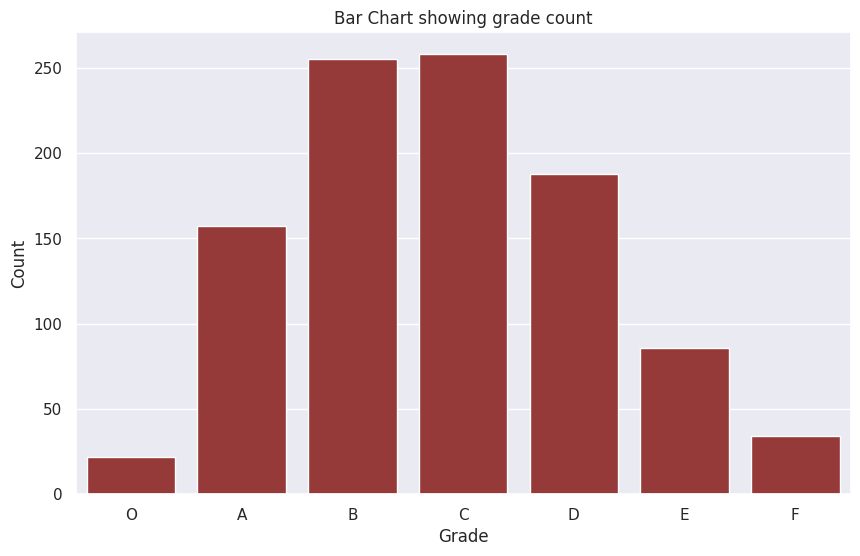

In [60]:
grades = sorted_df['grade']
value_counts = grades.value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, color="brown",order=["O", "A", "B", "C", "D", "E", "F"])
plt.xlabel("Grade")
plt.ylabel("Count")
plt.savefig("Analysis_grade_count.png")
plt.title("Bar Chart showing grade count")
plt.show()

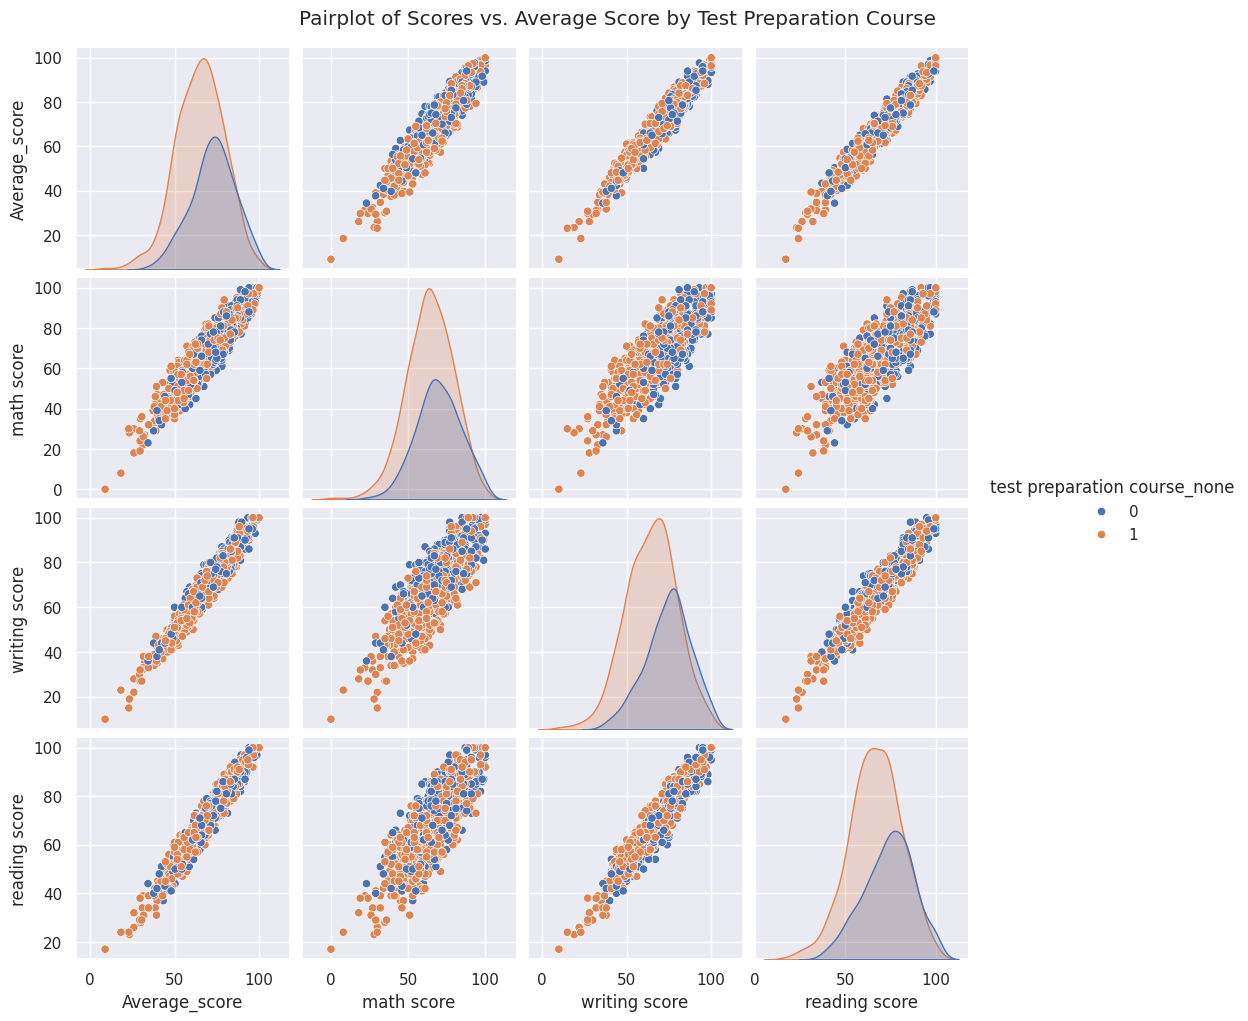

In [61]:
g = sns.pairplot(data, hue='test preparation course_none',
                 vars=['Average_score', 'math score', 'writing score', 'reading score'])

# Customize the plot (e.g., labels and title)
g.fig.suptitle("Pairplot of Scores vs. Average Score by Test Preparation Course", y=1.02)

# Save the plot to a file
plt.savefig("Analysis_test_prepartion.png")

# Show the plot
plt.show()

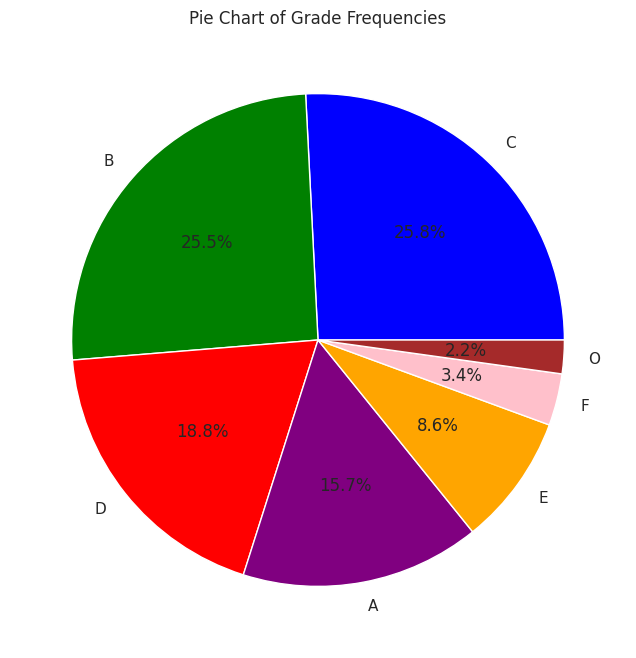

In [63]:
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown'])
plt.title("Pie Chart of Grade Frequencies")
plt.savefig("Analysis_grade_frequencies.png")
plt.show()

In [64]:
import seaborn as sns

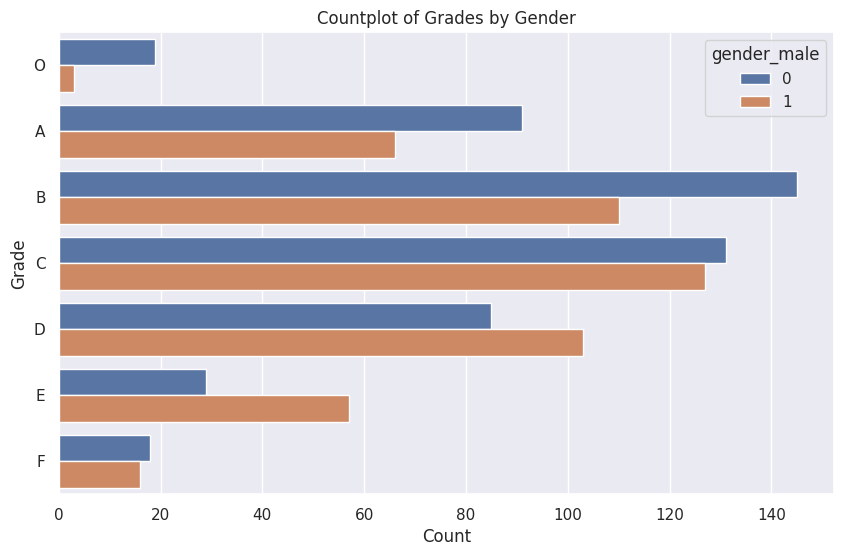

In [67]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y="grade", hue="gender_male", data=data, order=["O", "A", "B", "C", "D", "E", "F"])


ax.set_xlabel("Count")
ax.set_ylabel("Grade")
ax.set_title("Countplot of Grades by Gender")

plt.savefig("Analysis_Grade_gender.png")


plt.show()

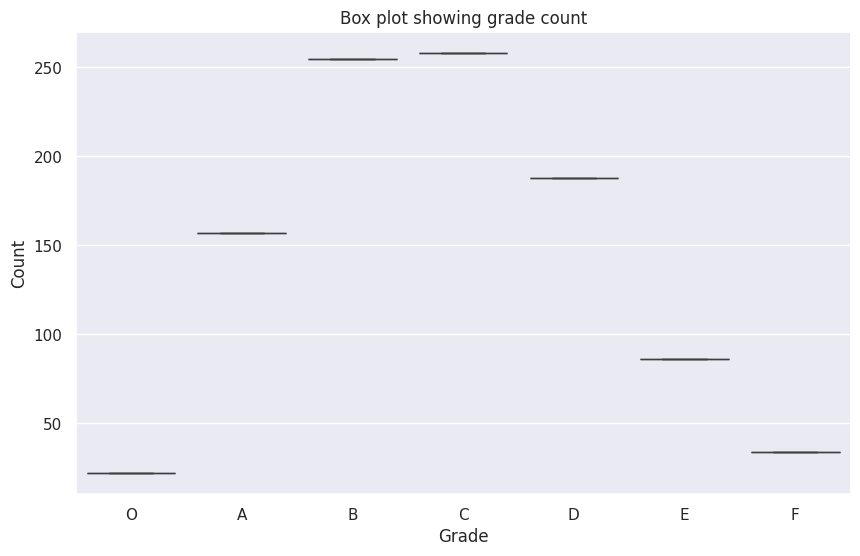

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=value_counts.index, y=value_counts.values, color="brown",order=["O", "A", "B", "C", "D", "E", "F"])
plt.xlabel("Grade")
plt.ylabel("Count")
plt.title("Box plot showing grade count")
plt.savefig("Analysis_box_grade.png")
plt.show()